# 2 K-Means

### 1 Import libraries

In [15]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2 Import Data

In [16]:
Data=pd.read_csv('crime_data.csv',index_col=0)
Data

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


# 3. Data Understanding

In [17]:
Data.shape

(50, 4)

In [18]:
Data.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [19]:
Data.duplicated().sum()

0

In [20]:
Data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [21]:
Data.duplicated().sum()

0

In [22]:
from sklearn import preprocessing

In [23]:
crime_rate_STD=preprocessing.scale(Data)
crime_rate_STD
%matplotlib inline

In [43]:
crime_rate_STD=pd.DataFrame(crime_rate_STD)
crime_rate_STD

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


In [25]:
#Use Elbow Graph to find optimum number of clusters (K value) from K values range

In [26]:
plt.figure(figsize=(10,8))
wcss = []
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(crime_rate_STD)
    wcss.append(kmeans.inertia_)   #Criterion based on which k-means clustering works

<Figure size 720x576 with 0 Axes>

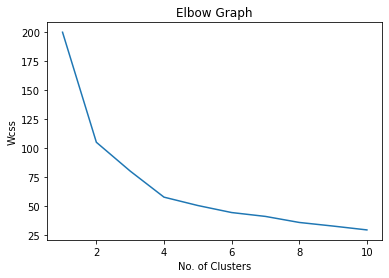

In [27]:
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('No. of Clusters')
plt.ylabel('Wcss')
plt.show()

In [35]:
# 4 Means: we have taken K=4 as our clusters based on above visualisation.
# Random_state=42, means we are randomly dividing the entire data into 42 rows for the initial Centroid
from sklearn.cluster import KMeans
cluster_4=KMeans(n_clusters=4,random_state=42)
cluster_4.fit_predict(crime_rate_STD)

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [36]:
cluster_4.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

# Add cluster to the original Dataset 

In [37]:
Data['Cluster_id']=cluster_4.labels_
Data

,Murder,Assault,UrbanPop,Rape,Cluster_id
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,2
Connecticut,3.3,110,77,11.1,0
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,2
Georgia,17.4,211,60,25.8,1


# Calculate the centroids of each Clusters

In [38]:
cluster_4.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842]])

In [41]:
#value Count of each cluster
Data['Cluster_id'].value_counts()

0    16
2    13
3    13
1     8
Name: Cluster_id, dtype: int64

# Average of each features within their Cluster

In [42]:
Data.groupby('Cluster_id').agg(['mean']).T

,Cluster_id,0,1,2,3
Murder,mean,5.65625,13.9375,10.815385,3.600000
Assault,mean,138.87500,243.6250,257.384615,78.538462
UrbanPop,mean,73.87500,53.7500,76.000000,52.076923
Rape,mean,18.78125,21.4125,33.192308,12.176923


In [46]:
Data

,Murder,Assault,UrbanPop,Rape,Cluster_id
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,2
Connecticut,3.3,110,77,11.1,0
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,2
Georgia,17.4,211,60,25.8,1


# Visualization of Clusters with their Centroids 

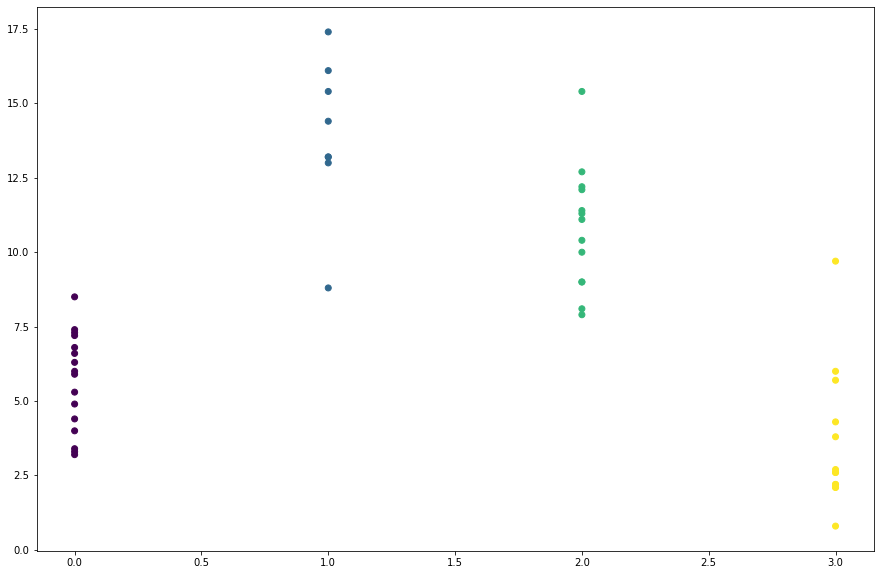

In [53]:
plt.figure(figsize=(15,10))
plt.scatter(Data['Cluster_id'],Data['Murder'],c=cluster_4.labels_)